**First Come First Served(FCFS) Algorithm:** Processes are attended the order as they arrive to a queue. It serves as non-preemptive way, which means if a process or job is started execution, then the operating system must complete its process or job. Until, the process or job is zero the new or next process or job does not start its execution. FCFS uses a simple queue structure to manage the order in which processes are scheduled. The first process that arrives is added to the back of the queue, and subsequent processes are added to the end of the queue.

**Advantages** :

* Easy to implement.
* Better for big porcesses as there is no context switching

* No process priority, fair algorthm.

**Disadvantages**:

*   Long waiting time
*   Possibility of occurence of convoy effect

*Convoy effect: It occurs when CPU is executing large process so that it takes so many times (let's say infinite) so it needs to wait for infinite amoiunt of time.*


*   Due to it's non-preemptive nature, the process will not release the CPU until it finishes its task and terminates.
*   List item

**Steps to implement:**

*   Input the process data: arrival time, burst time for each process, store it in an array or list of structures
*   Sort the processes by arrival time: Quick sort, merge sort

*   Initialize the necessary variables: completion time, turnaround time, waiting time, start time.
*   Process Execution: Start with first process in the queue, the start time of first process is the arrival time of the process. For each subsequent process, calculate the start time as completion time of the previous process, and then calculate the completion time by adding the burst time of the current process to the start time and update the waiting and turnaround times accordingly.

*   Calculate metrics: Once the processes are executed, calculate the waiting time and turnaround time for each process

Average waiting time = sum_of(waiting_time) / N
Average Turaround time = sum_of(turnaround_time) / N


Here we can start with finding and setting the waiting times for the processes:

In [ ]:
def waitingtime(process, n, wait_time):
  wait_time[0] = 0
  for i in range(1,n):
    wait_time[i] = process[i-1][1] + wait_time[i-1]


then we can find the turnaround times which is turnar_time = wait_time + burst_time

In [ ]:
def turnAroundTime(process, n, wait_time, burst_time, turn_time):
  for i in range(n):
    turn_time[i] = wait_time[i] + burst_time[i]


Now we can start with the execution

In [ ]:
def fcfs_scheduling(process):
    process.sort(key=lambda x: x[0])
    current_time = 0
    result_list = []
    total_waiting_time = 0

    for p in process:
        pid, arrival_time, burst_time = p
        if current_time < arrival_time:
            current_time = arrival_time
        wait_time = current_time - arrival_time
        turnar_time = wait_time + burst_time
        current_time += burst_time
        result_list.append((pid, wait_time, turnar_time))

        total_waiting_time += wait_time

    avg_waiting_time = total_waiting_time / len(process)
    return result_list, avg_waiting_time


Example case

In [ ]:
processes = [(1, 1.01, 5.73), (2, 1, 3.65), (3, 2, 8.7), (4, 3, 6.5)]

result, avg_waiting_time = fcfs_scheduling(processes)

for p, w, t in result:
  print(f"Job {p}: Wait = {w} ms, Done in = {t} ms")

print(f"\nAverage Waiting Time: {avg_waiting_time:.2f} ms")

Job 1: Wait = 0.0 ms, Done in = 5.73 ms
Job 2: Wait = 5.74 ms, Done in = 9.39 ms
Job 3: Wait = 8.39 ms, Done in = 17.09 ms
Job 4: Wait = 16.09 ms, Done in = 22.59 ms

Average Waiting Time: 7.55 ms


**Shortest Jobs First(SJF) Algorithm:**
It selects a process according to their execution time and prioritize the processes with smaller execution time. Both preemptive and non-preemptive scheduling strategies are possible in SJF. In SJF there is a significant amount of reduction in the average of waiting time for other processes that are waiting to be executed.

However, it can be quite challenging to estimate the burst time required for a process, making it difficult to apply .

*Burst time: Time required by a process for CPU execution.*

**Advantages of SJF:**

*   It reduces the average waiting time compared to FCFS.
*   Used for long-term scheduling

*   It's suitable for the jobs running in batches, where run times are already known.

**Disadvantages of SJF:**

*   The SJF algorithm may result in a starvation problem with extremely long turnaround times.

  *Turnaround time: Time Difference between completion time and arrival time.*

*   As we are unable to estimate the duration of the upcoming CPU process burst time, we cannot utilize SJF for short-term CPU scheduling

**Steps to Implement(Non-preemptive SJF):**

*   Input the process data, arrival and burst time, each process must be assigned to a unique process ID.
*   Sort Processes by Arrival Time: if two processes have the same arrival time, sort them based on their burst time(shortest burst time first)

*   Initialize Variables, completion time, turnaround time, waiting time
*   Execution of processes: Start executing the process with the shortest burst time first from the list of available processes, when finished, pick another with shortest burst time, keep track of completion time for each

*   Calculate Waiting Time and Turnaround Time


**Steps to Implement(preemptive SJF):**

*   Input process data, arrival time, burst time, remaining burst time.
*   Sort by arrival time, if same look at the burst time, prioritize shortest

*   Initialize variabales, remaining burst time = burst time, completion time, turnaround time and waiting time.
*   Process execution, keep track of current time, at each time check for processes that have arrived and can be executed. choose the process with shortest remaining burst time, if a new process arrives with a shorter burst time than the currently executing process, preempt the current process and execute the new process.


*   track process execution, update remaining burst time
*   Calculate waiting time, turnaround time and their averages



















In [ ]:
def sjf_scheduling(process):
  process.sort(key=lambda x: (x[1], x[2]))
  current_time = 0
  result_list = []
  total_waiting_time = 0
  total_turnaround_time = 0

  for pid, arrival_time, burst_time in process:
    if current_time < arrival_time:
      current_time = arrival_time

    wait_time = current_time - arrival_time
    turnar_time = wait_time + burst_time
    current_time += burst_time
    result_list.append((pid, wait_time, turnar_time))

    total_waiting_time += wait_time
    total_turnaround_time += turnar_time


  avg_waiting_time = total_waiting_time / len(process)
  avg_turnaround_time = total_turnaround_time / len(process)

  return result_list, avg_waiting_time, avg_turnaround_time

Example case:


In [ ]:
processes = [(1, 1.01, 5.73), (2, 1, 3.65), (3, 2, 8.7), (4, 3, 6.5)]

result, avg_waiting_time, avg_turnaround_time = sjf_scheduling(processes)

for p, w, t in result:
  print(f"Job {p}: Wait = {w} ms, Done in = {t} ms")

print(f"\nAverage Waiting Time: {avg_waiting_time:.2f} ms")
print(f"\nAverage Turnaround Time: {avg_turnaround_time:.2f} ms")

Job 2: Wait = 0 ms, Done in = 3.65 ms
Job 1: Wait = 3.6400000000000006 ms, Done in = 9.370000000000001 ms
Job 3: Wait = 8.38 ms, Done in = 17.08 ms
Job 4: Wait = 16.08 ms, Done in = 22.58 ms

Average Waiting Time: 7.03 ms

Average Turnaround Time: 13.17 ms


**Round Robin Scheduling:**
System rotates through all the processes, allocating each of them a fixed time slice.

The primary goal of this scheduling method is to ensure that all processes are given an equal opportunity to execute, promoting fairness among tasks.

Process Arrival: Processes enter the system and
are placed in a queue.

Time Allocation: Each process is given a certain amount of CPU time, called a quantum.

Execution: The process uses the CPU for the allocated time.

Rotation: If the process completes within the time, it leaves the system. If not, it goes back to the end of the queue.

Repeat: The CPU continues to cycle through the queue until all processes are completed.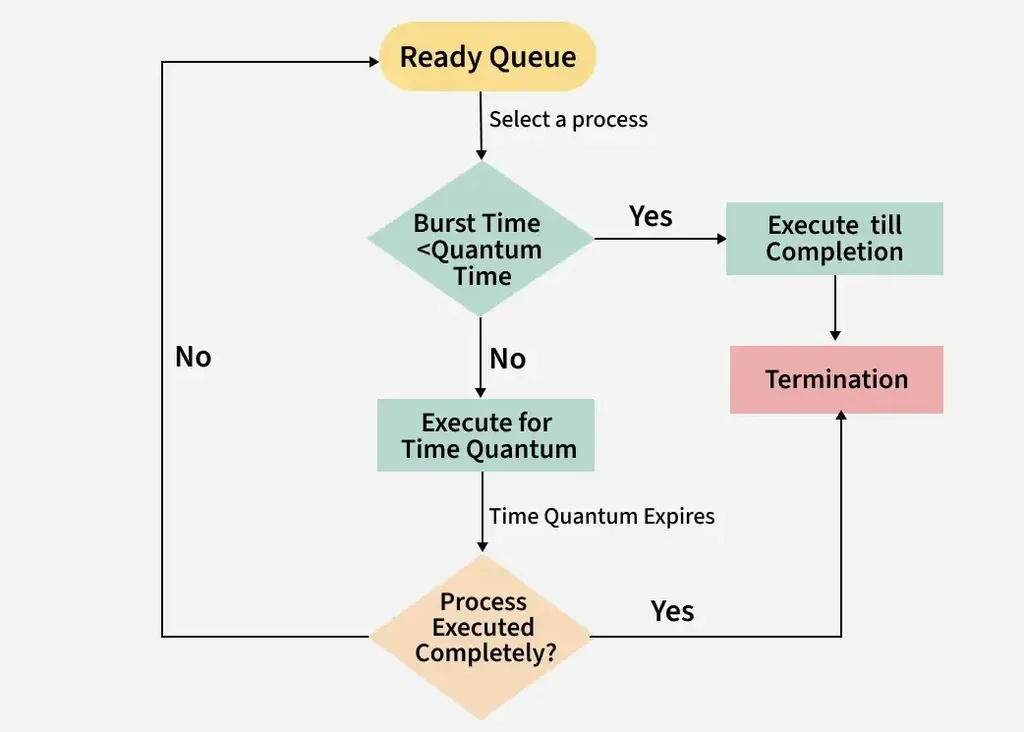

**Steps to implement:**
*  Initialization, Create a queue to store the processes that are in the ready state (i.e., ready to be executed by the CPU).
  Each process should have, PID, Burst time, remaining time, arrival time, completion time, turnaround time, waiting time

*  Queue Setup: Initially, all processes are placed in the ready queue, use a FIFO queue to maintain the order of processes as they arrive.

*  Process Execution: Assign each process a time slice (quantum), which is the maximum amount of time a process can run before it is preempted and another process is given the CPU.
Start executing the process at the front of the queue.

*  Time Slice Execution: If the remaining burst time of the current process is less than or equal to the time slice (quantum):
Execute the process for the remaining burst time and remove it from the queue. Calculate the process’s completion time, turnaround time, and waiting time. If the remaining burst time is greater than the time slice: Execute the process for the full time slice and then move it to the back of the queue (preempting it).
The remaining burst time is reduced by the time slice amount.

*  Repeat: This process continues in a round-robin fashion until all processes are completed. Once all processes are executed, calculate the average waiting time and average turnaround time for the system.

In [ ]:
def round_robin_scheduling(processes, quantum):
    current_time = 0
    result_list = []
    total_waiting_time = 0
    total_turnaround_time = 0

    queue = processes[:]
    remaining_burst_times = {pid: burst_time for pid, arrival_time, burst_time in processes}

    completion_time = {}
    first_execution_time = {}

    while queue:
        pid, arrival_time, burst_time = queue.pop(0)

        if current_time < arrival_time:
            current_time = arrival_time

        execution_time = min(quantum, remaining_burst_times[pid])
        remaining_burst_times[pid] -= execution_time

        if pid not in first_execution_time:
            first_execution_time[pid] = current_time

        current_time += execution_time

        if remaining_burst_times[pid] > 0:
            queue.append((pid, arrival_time, remaining_burst_times[pid]))
        else:
            completion_time[pid] = current_time

    for pid, arrival_time, burst_time in processes:
        turnaround_time = completion_time[pid] - arrival_time
        waiting_time = turnaround_time - burst_time

        result_list.append((pid, waiting_time, turnaround_time))
        total_waiting_time += waiting_time
        total_turnaround_time += turnaround_time

    avg_waiting_time = total_waiting_time / len(processes)
    avg_turnaround_time = total_turnaround_time / len(processes)

    return result_list, avg_waiting_time, avg_turnaround_time


Example Case:


In [ ]:
processes = [(1, 1.01, 5.73), (2, 1, 3.65), (3, 2, 8.7), (4, 3, 6.5)]
quantum = 4

result, avg_waiting_time, avg_turnaround_time = round_robin_scheduling(processes, quantum)

for p, w, t in result:
  print(f"Job {p}: Wait = {w} ms, Done in = {t} ms")

print(f"\nAverage Waiting Time: {avg_waiting_time:.2f} ms")
print(f"\nAverage Turnaround Time: {avg_turnaround_time:.2f} ms")

Job 1: Wait = 11.649999999999999 ms, Done in = 17.38 ms
Job 2: Wait = 4.01 ms, Done in = 7.66 ms
Job 3: Wait = 14.89 ms, Done in = 23.59 ms
Job 4: Wait = 15.39 ms, Done in = 21.89 ms

Average Waiting Time: 11.48 ms

Average Turnaround Time: 17.63 ms


So if we compare the Average Waiting Times:
Shortest job first < First Come First Served < Round Robin

Even if Round Robin has the biggest waiting time, it has own advantages such as it solves the starvation problem using the emptive manner. Every process uses the CPU. Why don't we use SJF then? It causes another problems as well, as i explained the disadvantages in the descripiton, it can cause starvation problem as well and the processes may have too much turnaround times.
